In [50]:
import sys
sys.path.append('/home/saif/anaconda2/lib/python2.7/site-packages')

import cv2
from cv2 import cv
import skvideo.io
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import matplotlib.cm as cm

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

def inside(r, q):
    rx, ry, rw, rh = r
    qx, qy, qw, qh = q
    return rx > qx and ry > qy and rx + rw < qx + qw and ry + rh < qy + qh

def draw_detections(img, rects, thickness = 3):
    for x, y, w, h in rects:
        # the HOG detector returns slightly larger rectangles than the real objects.
        # so we slightly shrink the rectangles to get a nicer output.
        pad_w, pad_h = int(0.15*w), int(0.05*h)
        cv2.rectangle(img, (x+pad_w, y+pad_h), (x+w-pad_w, y+h-pad_h), (255, 0, 0), thickness)

In [43]:
capture = skvideo.io.VideoCapture('/home/saif/Videos/GoPro/slice3.mp4')
capture.isOpened()

True

In [42]:
#num_frames=int(capture.get(cv.CV_CAP_PROP_FPS))
#print num_frames
#from skimage import io
#capture2 = io.Video('/home/saif/Videos/GoPro/slice3.mp4')
#capture.frame_count()

In [44]:
startTime = datetime.now()

frames={}
count=0
while(count<=2200):
    success,image = capture.read()
    key = count
    frames[count] = image
    #if cv2.waitKey(10) == 27:                   
    #  break
    count += 1

print datetime.now() - startTime

0:00:16.430387


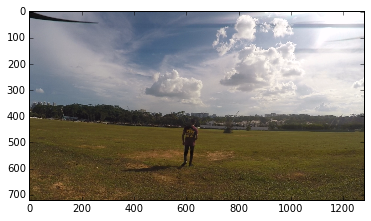

In [46]:
imgplot = plt.imshow(frames[2000])

0:00:00.628355


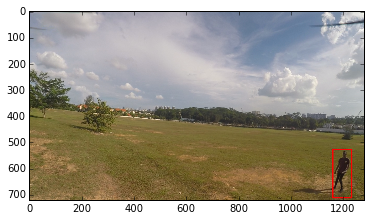

In [103]:
startTime = datetime.now()

image=frames[1600]
src = image.copy()
blur = cv2.medianBlur(src,5)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
use = cv2.medianBlur(gray,5)
ret,th1 = cv2.threshold(use,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(use,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,111,12)
th3 = cv2.adaptiveThreshold(use,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,81,10)

found, w = hog.detectMultiScale(blur, winStride=(8,8), padding=(32,32), scale=1.15)
draw_detections(src, found)
imgplot = plt.imshow(src)

print (datetime.now() - startTime)

In [70]:
cv2.imshow('pic', src)
cv2.waitKey(0)

error: -------src-dir-------/opencv-2.4.10/modules/highgui/src/window.cpp:501: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvShowImage


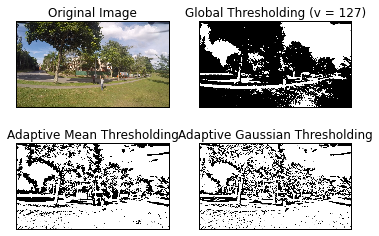

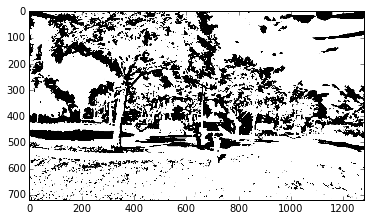

In [99]:
image=frames[300]
src = image.copy()
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
use = cv2.medianBlur(gray,5)

ret,th1 = cv2.threshold(use,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(use,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,75,12)
th3 = cv2.adaptiveThreshold(use,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,81,10)

titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image, th1, th2, th3]
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

imgplot = plt.imshow(th2,cmap = cm.Greys_r)